# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.1+ KB


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


# 1. Is the distribution of body temperatures normal?

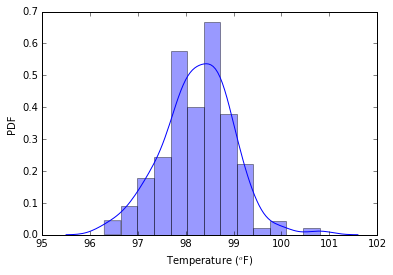

In [5]:
# histogram
sns.distplot(df['temperature'])
plt.xlabel('Temperature ($^o$F)')
plt.ylabel('PDF')

In [6]:
# The skewness
df['temperature'].skew()

-0.0044191303387126875

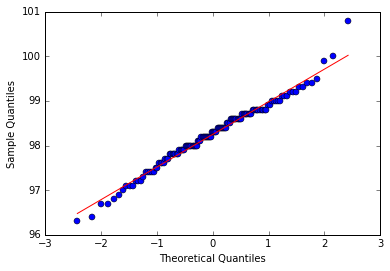

In [7]:
# Quantile-Quantile Plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(df['temperature'], line='s')
pyplot.show()

## Statistical Normality Tests 
The null hypothesis (Ho) - data is belonged to the normal distribution

### Shapiro-Wilk Test

In [8]:
# Shapiro-Wilk Test
from scipy.stats import shapiro


In [9]:
# normality test
stat, p = shapiro(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


### D'Agostino and Pearson's Test

In [10]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest


In [11]:
# normality test
stat, p = normaltest(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=2.704, p=0.259
Sample looks Gaussian (fail to reject H0)


## Answer:
The temperature data is ditributed normally. <b/>
* Skewness is close to 0 <b/>
* Q-Q plot: most of scatter points are around the diagonal line <b/>
* Normal test: p-values are larger than significant level (0.05) <b/>

# 2. Is the sample size large? Are the observations independent?

In [12]:
df.shape

(130, 3)

# Answer:
* Yes. The sample size is large (n = 130 >30).
* Yes. The observations are independent (n= 130 < 10% of the population N (currently more than 7 billions))

# 3. Is the true population mean really 98.6 degrees F?
* First, try a bootstrap hypothesis test.
* Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the t or z statistic?
* Now try using the other test. How is the result be different? Why?

## Bootstrap hypothesis test

In [13]:
# generate bootstrap function
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# generates many bootstrap replicates from the data set. 
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates


In [14]:
# true mean
muy = 98.6

# data of temperature in np.array
x1=np.array(df['temperature'])

In [15]:
np.random.seed(1)

# Make an array of translated x1
translated_x1 = x1 - np.mean(x1) + muy

# Take bootstrap replicates of translated_x1
bs_replicates = draw_bs_reps(translated_x1, np.mean, 10000)
print('Temperature mean of sample = %.4f' % np.mean(x1))

# Compute fraction of replicates that are less than the observed x1
p = np.sum(bs_replicates <= np.mean(x1)) /10000

print('The null hypothesis (Ho): the true population mean is 98.6 degrees F')
print('alpha = 0.05')
alpha = 0.05

# Print the p-value
print('p-value = %.4f' % p)

if p < alpha:
    print('Ho can be rejected')
else:
    print('Ho cannot be rejected')


Temperature mean of sample = 98.2492
The null hypothesis (Ho): the true population mean is 98.6 degrees F
alpha = 0.05
p-value = 0.0000
Ho can be rejected


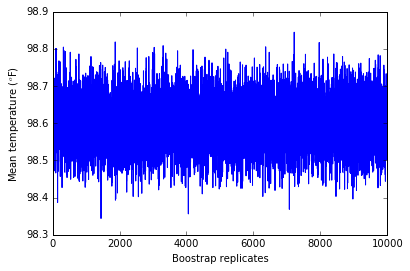

In [16]:
plt.plot(bs_replicates)
plt.xlabel('Boostrap replicates')
plt.ylabel('Mean temperature ($^o$F)')


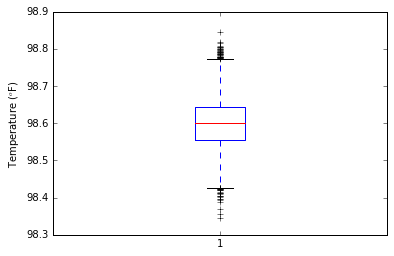

In [17]:
_ = plt.boxplot(bs_replicates)
plt.ylabel('Temperature ($^o$F)')
plt.show()

## Frequentist statistical testing

In [18]:
# one-sample t-test
from scipy.stats import ttest_1samp
t_stat, p_val_t = ttest_1samp(df['temperature'], muy)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

('t-statistic:', -5.4548232923645195)
('p value =', 2.4106320415561276e-07)


In [19]:
# hypothesis test for t-score
print('The null hypothesis (Ho): the true population mean is 98.6 degrees F')
print('alpha = 0.05')
alpha = 0.05
if p_val_t < alpha:
    print('Ho can be rejected')
else:
    print('Ho cannot be rejected')

The null hypothesis (Ho): the true population mean is 98.6 degrees F
alpha = 0.05
Ho can be rejected


## Try using the other test

In [20]:
# one-sample z-test
from statsmodels.stats.weightstats import ztest
z_stat, p_val_z = ztest(x1= df['temperature'], value = muy)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

if p_val_z < alpha:
    print('Ho can be rejected')
else:
    print('Ho cannot be rejected')

('z-statistic:', -5.4548232923645195)
('p value =', 4.9021570141012155e-08)
Ho can be rejected


# Answer: No, the true population mean is different from 98.6 degrees F
* Both bootstrap hypothesis test and frequentist statistical testing also rejected Ho.
* One-sample test should be used because we're comparing one type of samples (temperature) with a number (98.6).
* It should use t-test. Because population mean is known and population standard deviation is unknown.


# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the t and z statistic?

In [21]:
# generate random sample
np.random.seed(1)
sample = np.random.choice(df['temperature'], size=10)
print('Temperature mean of small sample = %.4f' % np.mean(sample))

Temperature mean of small sample = 98.2700


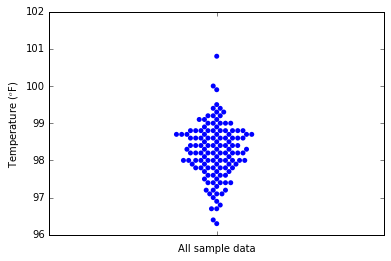

In [22]:
sns.swarmplot(y=df['temperature'])
plt.xlabel('All sample data')
plt.ylabel('Temperature ($^o$F)')


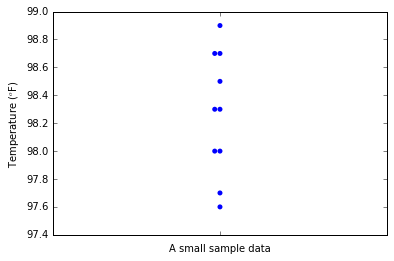

In [23]:
sns.swarmplot(y=sample)
plt.xlabel('A small sample data')
plt.ylabel('Temperature ($^o$F)')

In [24]:
# one-sample t-test
t_stat_sample, p_val_t_sample = ttest_1samp(sample, muy)

print('t-statistic:',t_stat_sample)
print('p value =',p_val_t_sample)

('t-statistic:', -2.3726616409619443)
('p value =', 0.041726552128943807)


In [25]:
# one-sample z-test
z_stat_sample, p_val_z_sample = ztest(x1= sample, value = muy)

print('z-statistic:',z_stat_sample)
print('p value =',p_val_z_sample)

('z-statistic:', -2.3726616409619443)
('p value =', 0.017660433849772922)


## Answer:
* t-test is the correct statistical test to use. Because the lenght of the small sample is very small.
* p-value of t-test is larger than z-test. It means that it is easy to reject null hypothesis by using z-test.

# 5. At what temperature should we consider someone's temperature to be "abnormal"?
* As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
* Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

## The boostrap approach

In [26]:
np.random.seed(1)

# generate 10000 boostrap replicates
bs_replicates_1 = draw_bs_reps(x1, np.mean, 10000)

In [27]:
from scipy import stats
conf_int_bs = stats.norm.interval(alpha=0.95, loc=np.mean(bs_replicates_1), scale=np.std(bs_replicates_1))
conf_int_bs

(98.123329416327252, 98.374597660595825)

In [28]:
np.percentile(bs_replicates_1,[2.5,97.5])

array([ 98.12230769,  98.37384615])

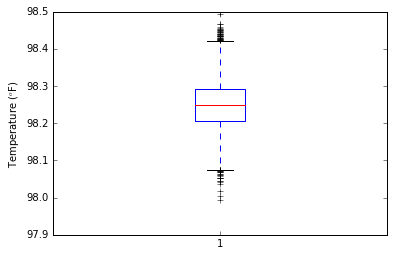

In [29]:
_ = plt.boxplot(bs_replicates_1)
plt.ylabel('Temperature ($^o$F)')
plt.show()

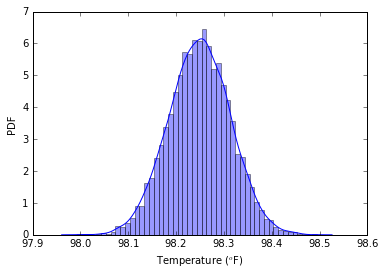

In [30]:
sns.distplot(bs_replicates_1)
plt.xlabel('Temperature ($^o$F)')
plt.ylabel('PDF')


In [31]:
print("From boostrap approach, we consider someone's temperature to be 'abnormal' when its temperature is outside \
this range (from %.2f" % conf_int_bs[0] + " to %.2f degree F)" % conf_int_bs[1])

From boostrap approach, we consider someone's temperature to be 'abnormal' when its temperature is outside this range (from 98.12 to 98.37 degree F)


## The frequentist approach

In [32]:
conf_int_fre = stats.norm.interval(alpha=0.95, loc=np.mean(df['temperature']), scale=np.std(df['temperature']))

print('95% confidence interval:',conf_int_fre)

('95% confidence interval:', (96.817755826748211, 99.680705711713287))


In [33]:
np.percentile(df.temperature,[2.5, 97.5])

array([ 96.7225,  99.4775])

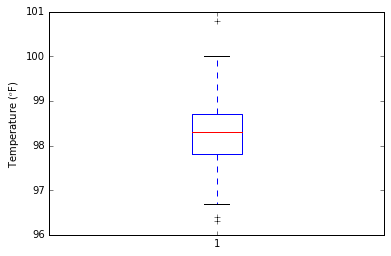

In [34]:
plt.boxplot(df.temperature)
plt.ylabel('Temperature ($^o$F)')


In [35]:
print("From frequentist approach, we consider someone's temperature to be 'abnormal' when its temperature is outside \
this range (from %.2f" % conf_int_fre[0] + " to %.2f degree F)" % conf_int_fre[1])

From frequentist approach, we consider someone's temperature to be 'abnormal' when its temperature is outside this range (from 96.82 to 99.68 degree F)


# 6. Is there a significant difference between males and females in normal temperature?
* What testing approach did you use and why?
* Write a story with your conclusion in the context of the original problem.

In [36]:
male_temperature = df[df.gender=='M'].temperature
female_temperature = df[df.gender=='F'].temperature

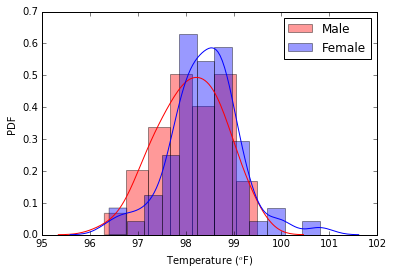

In [37]:
sns.distplot(male_temperature, color='red')
sns.distplot(female_temperature, color='blue')
plt.legend(['Male','Female'])
plt.xlabel('Temperature ($^o$F)')
plt.ylabel('PDF')

In [38]:
# two-sample t-test
from scipy.stats import ttest_ind
t_stat_2s, p_val_t_2s = ttest_ind(male_temperature,female_temperature)

print('t-statistic:',t_stat_2s)
print('p value =',p_val_t_2s)

('t-statistic:', -2.2854345381656103)
('p value =', 0.023931883122395609)


In [39]:
# hypothesis test
alpha = 0.05
print('The null hypothesis (Ho) - there is no difference between male and female temperatures ')
if p_val_t_2s < alpha:
    print('Ho can be rejected')
else:
    print('Ho cannot be rejected')

The null hypothesis (Ho) - there is no difference between male and female temperatures 
Ho can be rejected


In [40]:
male_temperature.mean()

98.104615384615371

In [41]:
female_temperature.mean()

98.393846153846141

## Answer:
Yes, the difference in male and female body temperatures is statistically significant (Female temperature is moderately higher than male one).

## Conclusion:
1. The temperature data in this study is followed the normal distribution.
2. The true population mean of human body temperature varies from 98.6 degrees F.
3. Human body temperature should only be considered "abnormal" if its value is not in the range of 96.82 - 99.68 degree F.
4. There is a statistically significant difference between males and females in human body temperature.¶